# Practicing PCA on a Face Dataset
In this exercise, we explore the application of the PCA on the LFW (Labeled Faces in the Wild) dataset which is available through the sklearn package.
# Submission
- There are three tasks for you.
- Report the results and answer the questions in the pdf file that you would submit along with your other solutions.
- Additionally, submit your code in the same Jupiter notebook format. (keep the overal format of the notebook unchanged)


# Packages
First of all, let's import the packages we need for this assignment. 

In [1]:
# loading need libraries
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dataset characteristics
Here we take a look at the structure/properties of the dataset.

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
n_samples, image_height, image_width = lfw_people.images.shape

X = lfw_people.data
# the label to predict is the id of the person
Y = lfw_people.target
Y_names = lfw_people.target_names
n_classes = Y_names.shape[0]

print("Dataset properties:")
print("\t Number of data points: %d" % X.shape[0])
print("\t Number of features: %d" % X.shape[1])
print("\t Number of classes: %d" % n_classes)
print("\t Width of each image: %d" % image_width)
print("\t Height of each image: %d" % image_height)

print("\t What is Y?", Y)
print("\t What is Y_Shape?", Y.shape)
print("\t What is Y_names?", Y)
print("\t What is Y_names_Shape?", Y_names.shape)

print("So we have %d samples " % n_samples)
print("each sample has %d pixels" % (image_height*image_width))

print("each pictrue is a row ({0:d}) and each pixel is column feature ({1:d}), so we need to reduce the dimension".format(n_samples, (image_height*image_width)))

Dataset properties:
	 Number of data points: 1288
	 Number of features: 11750
	 Number of classes: 7
	 Width of each image: 94
	 Height of each image: 125
	 What is Y? [5 6 3 ... 5 3 5]
	 What is Y_Shape? (1288,)
	 What is Y_names? [5 6 3 ... 5 3 5]
	 What is Y_names_Shape? (7,)
So we have 1288 samples 
each sample has 11750 pixels
each pictrue is a row (1288) and each pixel is column feature (11750), so we need to reduce the dimension


# Showing the pictures

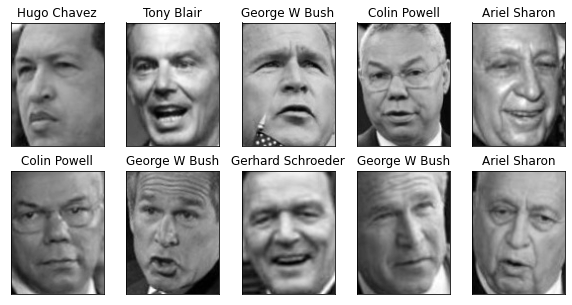

In [3]:
def plot_faces(images, labels, names, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    f = plt.figure(figsize=(10,5))
    for i in range(n_row * n_col):
        subfigure = f.add_subplot(n_row, n_col, i + 1)
        subfigure.imshow(images[i].reshape((image_height, image_width)), cmap=plt.cm.gray)       
        subfigure.set_title(names[labels[i]])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()
    

plot_faces(X, Y, Y_names, 2, 5)

# Eigenfaces
Run the below code to generate the "average faces" as well as the first "eigen faces" for each of the seven classes. This is just a demonstration; no need to do anything here.

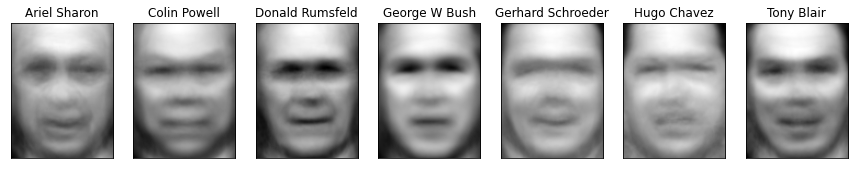

(2, 11750)
(2, 11750)
(2, 11750)
(2, 11750)
(2, 11750)
(2, 11750)
(2, 11750)


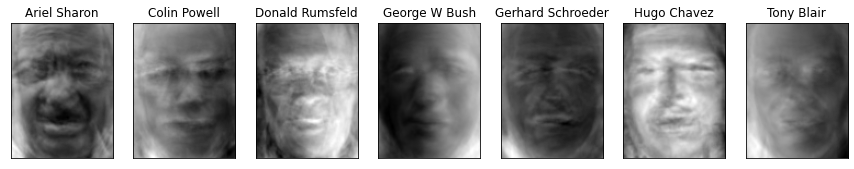

In [4]:
def average_image_per_class(images, labels, label):
    class_average = np.mean(images[labels == label], axis = 0)
    return class_average

def eigen_face_per_class(images, labels, label):
    pca = PCA(n_components=2)
    pca.fit(images[labels == label])
    eigen_faces = pca.components_
    print(eigen_faces.shape)
    return eigen_faces[0,:]
    
def plot_class_representatives(images, labels, names, aggregator):
    f = plt.figure(figsize=(15,10))
    for i in range(7):
        subfigure = f.add_subplot(1, 7, i + 1)
        class_representative = aggregator(X, Y, i)
        
        subfigure.imshow(class_representative.reshape((image_height, image_width)), cmap=plt.cm.gray)       
        subfigure.set_title(Y_names[i])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_class_representatives(X, Y, Y_names, aggregator=average_image_per_class)
plot_class_representatives(X, Y, Y_names, aggregator=eigen_face_per_class)


# PCA visualization
It is hard to visualize and get a sense of highdimensional data. One approach to address this problem is "dimensionality reduction". Here we project the data into the 2D plane to be able to "see" what is going on. 

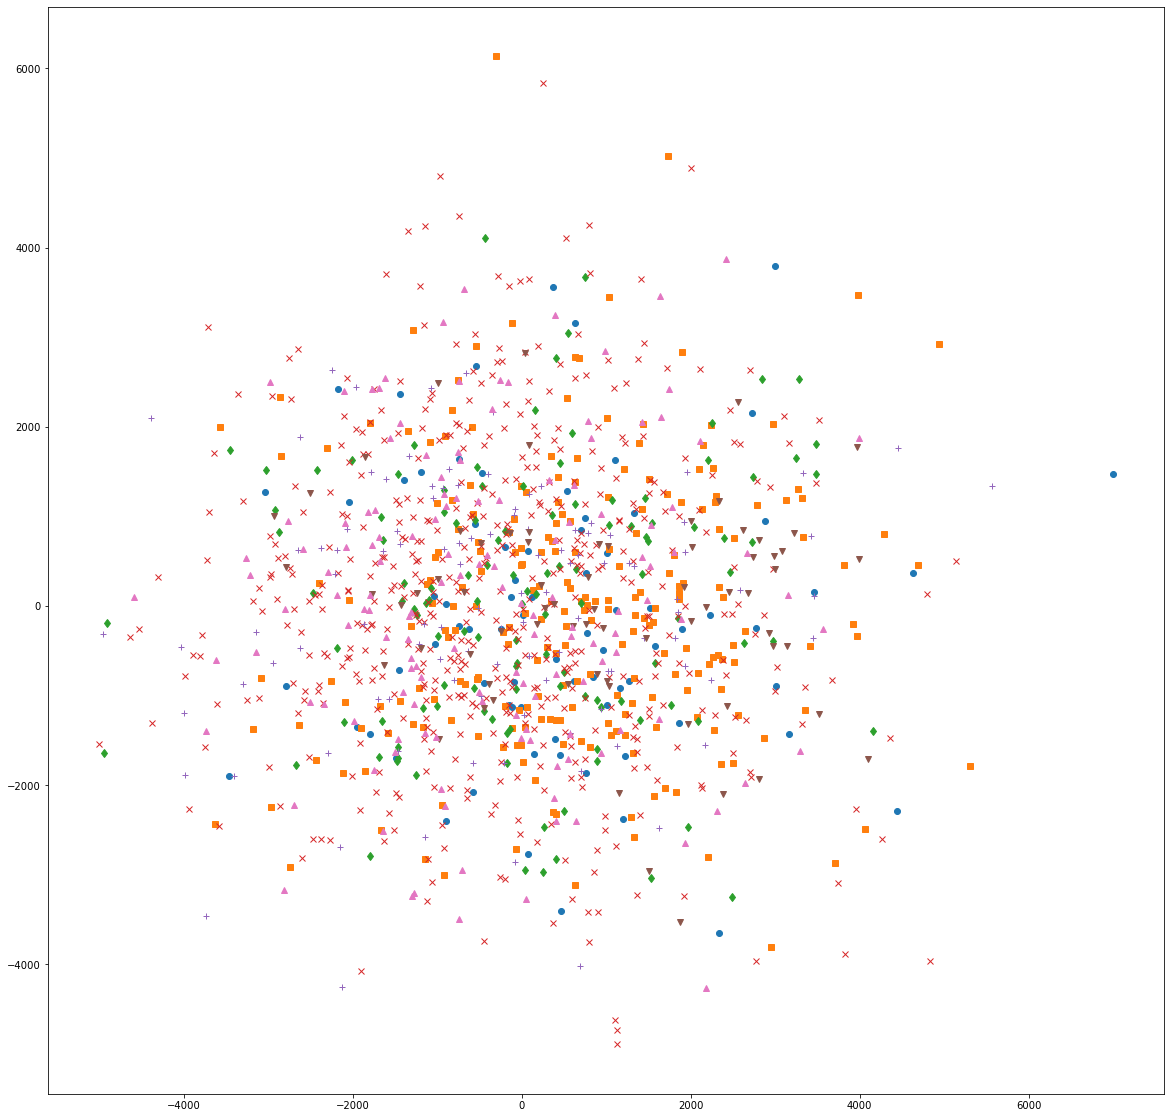

In [5]:
def pca_visualization(images, labels):
    pca = PCA(n_components=2)
    # This time we apply PCA one the whole data set
    pca.fit(images)  
    # Transforming the data into the 2D space
    T = pca.transform(images)
    
    markers = ['o', 's', 'd', 'x', '+', 'v', '^']
    fig = plt.figure(figsize=(20,20))
    for label in range(0,7):
        plt.plot(T[labels==label, 0], T[labels==label, 1], markers[label])

pca_visualization(X, Y)

# <font color="red">Task 1: Reconstructing images</font>
Some information is naturally lost when reducing the dimensionality of the data (just like the above scatter plot). In this part use the PCA (applied to the whole data set) to reduce the dimensionality of the data points to 2. Then, transform the 2D data points back to the original space to reconstruct the images. 

 - Plot the first 10 reconstructed images in the data set and include it in your pdf report. (10 points)

This is the 2D transformed Data: 
 [[  231.17772   234.95322]
 [ 1620.8441  -1261.1938 ]
 [-1231.0173   -483.78763]
 ...
 [ 3081.3042    615.97284]
 [-3113.63    -1032.4578 ]
 [  959.2784   -246.90382]]
In order to be more clear on T, we can find the dimesion of the T matrix: 
 (1288, 2)


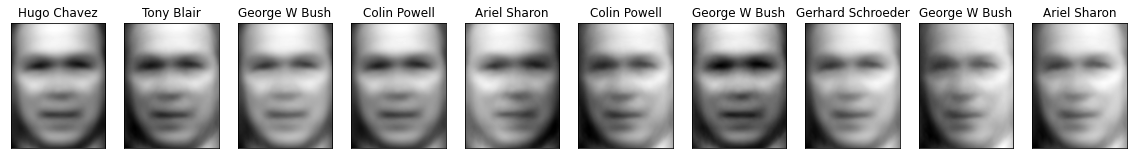

In [6]:
# your code goes here

# reduce dimensionality of the whole dataset first
def PCATo2D(images):
    pca = PCA(n_components = 2)
    # apply PCA on whole data set
    pca.fit(images)
    #transorm to 2D space 
    T = pca.transform(images)
    return T

# using the inverse PCA to reconstruct the image to high dimension
def inversePCA(images):
    pca = PCA(n_components = 2)
    pca.fit(images)
    lowD = pca.transform(images)
    Reconstructed = pca.inverse_transform(lowD)
    return Reconstructed

# plot the first 10 recovered images
def plot_inverse_images(Reconstructed, labels, names):
    f = plt.figure(figsize=(20,10)) 
    inversed_images = inversePCA(Reconstructed)
    for i in range(10):
        subfigure = f.add_subplot(2, 10, i + 1)
        subfigure.imshow(inversed_images[i].reshape((image_height, image_width)), cmap=plt.cm.gray)
        # show names on photos
        subfigure.set_title(names[labels[i]])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()



T = PCATo2D(X)
print("This is the 2D transformed Data: \n",T)
print("In order to be more clear on T, we can find the dimesion of the T matrix: \n",T.shape)

# recover first
Re = inversePCA(X)

# then plot
plot_inverse_images(Re, Y, Y_names)



# <font color="red">Task 2: Average Reconstruction Error</font>
Here we aim at measuring the information loss. First let's define the reconstruction error. We define the reconstruction error of a data point as the square of the Euclidean distance between the reconstructed image and the original image. 

- Apply PCA with only two components, and compute the average reconstruction error for each of the 7 classes, and include them in your report. Which class has the highest average reconstruction error? (10 points)
- If we use more components, we would get less error. What is the minimum number of components that we can choose so that the average reconstruction error for all (and each) of the classes is below 100? (10 points)

In [7]:
# your code goes here

#the error function first
def Ave_Error(images, images_recon):
    error = ((images - images_recon) ** 2).mean()
    return error

# calculated error for total
def total_lost(images, images_recon, labels):
    total_loss = Ave_Error(images, images_recon)
    return total_loss

# get total lost
print("total error = ",total_lost(X, Re, Y))

def ARE_per_class(images, labels):
    loss_per_class = list() 
    for i in range(7):
        X_train = images[labels==i]
        X_projected = inversePCA(X_train) # inversePCA function include PCA first (2 components)
        score = Ave_Error(X_train, X_projected)
        loss_per_class.append(score)
    return loss_per_class

# get each class lost
print("each class error = ",ARE_per_class(X, Y))


# try more components

# define a new inverse PCA to allow us change number of components
def new_inverse_pca(images, components):
    pca = PCA(n_components=components)
    pca.fit(images)
    T = pca.transform(images)
    Reconstructed = pca.inverse_transform(T)
    return Reconstructed

# minimum # of components keeps error in 100 (total)
def min_Com_total(images, labels):
    components = 0
    while True:
        images_recovered = new_inverse_pca(images, components)
        error = Ave_Error(images, images_recovered)
        if error < 100:
            break
        components += 1
    return components

print("min # of components (total) = ",min_Com_total(X, Y))

# minimum # of components keeps error in 100 (each class)
def min_Com_class(images, labels):
    minimum = list()
    for i in range(7):
        components = 0
        images_origional = images[labels==i]
        while True:
            image_recovered = new_inverse_pca(images_origional, components)
            error = Ave_Error(images_origional, image_recovered)
            if error < 100:
                minimum.append(components)
                break
            components += 1
    return minimum

print("min # of components (each class) = ",min_Com_class(X, Y))

total error =  1043.561
each class error =  [962.3334, 942.71173, 956.439, 1002.31744, 943.9516, 897.50916, 1010.05237]
min # of components (total) =  179
min # of components (each class) =  [42, 88, 58, 119, 52, 38, 63]


# <font color="red">Task 3: Train-Test Separation for PCA</font>
Use only the first 100 data points to find the PCA mapping (we call this set the training set, and the rest of the data set is called the test set). Then use this mapping to map all the images (train and test) to the 2d space and then back to the original space.

- Report the average reconstruction error for the train and the test images (no need to report for each class separately). Which one is higher? Why? (10 points)
- In the above, instead of using only the top 2 principal components, use the top 100 components. Report the average train and test reconstruction errors. Compare the results with the previous part and justify them. (10 points)

In [8]:
# your code goes here
def top100_inverse_PCA(images,components):
    pca = PCA(n_components=components)
    pca.fit(images[:100])
    T = pca.transform(images)
    Reconstructed = pca.inverse_transform(T)
    return Reconstructed

def ERROR_Split(images, components):
    
    recovered_data = top100_inverse_PCA(images, components)
    train_origion = images[:100]
    test_origion = images[100:]
    
    train_recovered = recovered_data[:100]
    test_recovered = recovered_data[100:]
    
    train_error = Ave_Error(train_origion, train_recovered)
    test_error = Ave_Error(test_origion, test_recovered)
    
    return train_error, test_error

print(ERROR_Split(X, 2))
print(ERROR_Split(X, 100))

(1012.4919, 1084.1616)
(1.5881164e-09, 370.51868)
